Roll : 1503022 <br>
Course No: CSE 4204 <br>
Sessional Task:1

---



[This notebook](https://colab.research.google.com/drive/1rzizYUzgIriAusOwlXhEYx_CMbsB_2JB#scrollTo=GnbobhEvjkCP) contains all the necessary result and codes and future works regarding this exercise.

**Numpy is imported for mathematical calculations. Matplotlib is imported for graphs**

In [17]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting

import sys

For a 4 input node XOR problem we can create input dataset of(16,4) size and output dataset of (16,1) size. In 4 input XOR problem output will be **1** only when there is **odd number** of 1 in input

In [2]:
#Main input-output dataset
inputs = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],
                   [1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
expected_output = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]])

**We will take 60% of main inputs by random for training our model**<br>
As we have very few data points for creating a well trained network the data should be shuffled so that we don't take training data from only one side. 

In [3]:
indices = np.arange(inputs.shape[0])
np.random.shuffle(indices)
print(indices)

[13  2  8 11  9 12 15  7  1  6  4  3 14 10  5  0]


In [4]:
import math
num_training_instances = math.ceil(0.6 * inputs.shape[0])
train_indices = indices[:num_training_instances]
test_indices = indices[num_training_instances:]
print(train_indices)
print(test_indices)

[13  2  8 11  9 12 15  7  1  6]
[ 4  3 14 10  5  0]


**Dividing the test & train data**

In [5]:
X_data_train, X_data_test = inputs[train_indices], inputs[test_indices]
Y_data_train, Y_data_test = expected_output[train_indices], expected_output[test_indices]

**Sigmoid funcion is used as activation function**

In [6]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

**Parameters of the network** <br>
Our required neural network structure has:<br>
1.   Input nodes :4
2.   Hidden nodes:6
3.   Output nodes:2

I tried & unfortunately faced some problem regarding implementing it with 2 output nodes. As this is a binary classification problem which can be implemented with 1 or 2 output nodes so,I opted for building it with 1 output node. Later in this document I will mention exactly where I faced the problems. [This is the notebook](https://colab.research.google.com/drive/1Fez2XgcVsjUF7_YmWL1zaLu769nFkEMV?usp=sharing) where I tried to implement it with 2 output nodes but failed. <br>

So here my network architecture is:<br>


1.   Input nodes:4
2.   Hidden nodes:6
3.   Output node:1

Hyperparameter learning rate (**lr**) and **epochs** were carefully chosen. 







In [7]:
epochs = 10000
lr = 0.1
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 4,6,1

**Random weights and bias initialization**

In [8]:
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)

Initial hidden weights: [0.82218926 0.62748822 0.57074028 0.55769074 0.02570751 0.87853231] [0.9782497  0.64133362 0.8764118  0.79107571 0.38732019 0.74184035] [0.36780466 0.49465624 0.12640705 0.89419813 0.05590097 0.39803138] [0.80798269 0.89575265 0.75547805 0.73714489 0.7476555  0.26760809]
Initial hidden biases: [0.16181609 0.08545931 0.05986885 0.51681149 0.23106191 0.10240252]
Initial output weights: [0.49935386] [0.52303604] [0.8388147] [0.55502698] [0.45916814] [0.95289282]
Initial output biases: [0.76634826]


**Training function** <br>
This is the training function implemented using Forward propagation and Backword propagation algorithms. **Squared error** and it's **derivatives** were used.

In [12]:
costs=[]
count=0
for _ in range(epochs):
  #Forward propagation
  hidden_layer_activation = np.dot(X_data_train,hidden_weights)
  hidden_layer_activation += hidden_bias
  hidden_layer_output = sigmoid(hidden_layer_activation)

  output_layer_activation = np.dot(hidden_layer_output,output_weights)
  output_layer_activation += output_bias
  predicted_output = sigmoid(output_layer_activation)

  #Backpropagation
  error = Y_data_train - predicted_output
  cost=np.square(error)
  mse=np.mean(cost)
  costs.append(mse)
  d_predicted_output = error * sigmoid_derivative(predicted_output)
  error_hidden_layer = d_predicted_output.dot(output_weights.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  #update
  output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
  output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
  hidden_weights += X_data_train.T.dot(d_hidden_layer) * lr
  hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr


predicted_output = (predicted_output > 0.5)
predicted_output = np.array(predicted_output, dtype=int)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print("\n")
for i in range(num_training_instances):
  if(predicted_output[i]==Y_data_train[i]):
    count=count+1
  print("For input",X_data_train[i],"Output",predicted_output[i])

acc_p=count/num_training_instances
print("Accuracy on test data=",acc_p*100,"%")


Output from neural network after 10,000 epochs: 

For input [1 1 0 1] Output [1]
For input [0 0 1 0] Output [1]
For input [1 0 0 0] Output [1]
For input [1 0 1 1] Output [1]
For input [1 0 0 1] Output [0]
For input [1 1 0 0] Output [0]
For input [1 1 1 1] Output [0]
For input [0 1 1 1] Output [1]
For input [0 0 0 1] Output [1]
For input [0 1 1 0] Output [0]
Accuracy on test data= 100.0 %


**The epoch vs error graph shows how the error is minimized.**

Text(0, 0.5, 'Loss value')

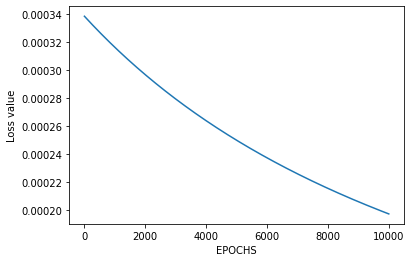

In [13]:
plt.plot(costs)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

**Performance on test data**


In [14]:
	hidden_layer_activation = np.dot(X_data_test,hidden_weights)
	hidden_layer_activation += hidden_bias
	hidden_layer_output = sigmoid(hidden_layer_activation)

	output_layer_activation = np.dot(hidden_layer_output,output_weights)
	output_layer_activation += output_bias
	predicted_output = sigmoid(output_layer_activation)
 
predicted_output = (predicted_output > 0.5)
predicted_output = np.array(predicted_output, dtype=int)
count=0
for i in range(6):
  if(predicted_output[i]==Y_data_test[i]):
    count=count+1

  print("For input",X_data_test[i],"Output",predicted_output[i])

acc=count/6
acc=acc*100
print("Accuracy on test data=",acc,"%")

 
	


For input [0 1 0 0] Output [1]
For input [0 0 1 1] Output [1]
For input [1 1 1 0] Output [0]
For input [1 0 1 0] Output [0]
For input [0 1 0 1] Output [1]
For input [0 0 0 0] Output [1]
Accuracy on test data= 33.33333333333333 %


**Result**<br>
Here we can see our network performes extraordinarily well on data which it has seen already. That's why we got 100% accuracy on Train data.<br>
As our dataset is very small and our network has never seen the test data it can't predict the output very well. Which we can see in merely **33%** accuracy.

**Plotting and Visualization** <br>
For creating a 2D representation of data I have converted it to decimal value and plotted it against our output value. From here we can see no singular straight line can predicts the zone of output 0 and 1.


[]

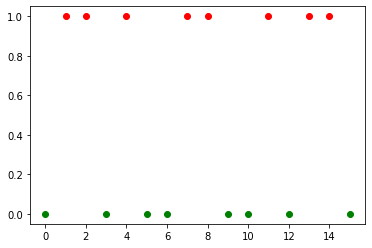

In [54]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -10, 10
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0 ,color="g")
ax.scatter(1, 1 ,color="r")
ax.scatter(2, 1, color="r")
ax.scatter(3, 0, color="g")
ax.scatter(4, 1, color="r")
ax.scatter(5, 0 ,color="g")
ax.scatter(6, 0 ,color="g")
ax.scatter(7, 1 ,color="r")
ax.scatter(8, 1 ,color="r")
ax.scatter(9, 0 ,color="g")
ax.scatter(10, 0 ,color="g")
ax.scatter(11, 1 ,color="r")
ax.scatter(12, 0 ,color="g")
ax.scatter(13, 1 ,color="r")
ax.scatter(14, 1 ,color="r")
ax.scatter(15, 0 ,color="g")

plt.plot()

**<h4>Disscussions</h4>** <br>






Expected Output for 2 node problem:

In [16]:
expected_output_2 = np.array([[1 ,0],[0, 1],[0, 1],[1, 0],[0, 1],[1 ,0],[1, 0],[0, 1],[0, 1],[1 ,0],[1 ,0],[0, 1],[1, 0],[0, 1],[0 ,1],[1 ,0]])

expected_output_2.shape

(16, 2)

Softmax function:<br>
In multiclass classification problem for Forward propagation in output node we have to use softmax function.Again for backpropagation for updating weights of hidden layer we need to use derivative of softmax function too. I had a problem getting the derivative function of softmax. It can be valid reason for which I couldn't get proper output. 